In [4]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [5]:
#load dataset
src = "http://bit.ly/w-data"
data = pd.read_csv(src)
print("Imported successfully")
data.head(10) #imported first ten data from dataset

Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


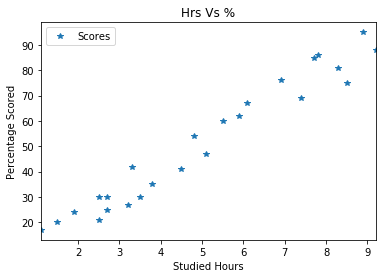

In [6]:
#plotting the distribution of hours vs %
data.plot(x='Hours' , y='Scores' , style = '*')
plt.title('Hrs Vs %')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage Scored')
plt.show()

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#build linear regression model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression(normalize=True)
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
lreg.coef_

array([9.77580339])

In [11]:
lreg.intercept_

2.483673405373196

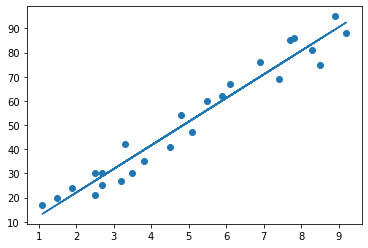

In [12]:
#plotting the regression line
plotLine = lreg.coef_*X+lreg.intercept_
plt.scatter(X, y)
plt.plot(X, plotLine);
plt.show()

In [13]:
#Evaluate the model
print('Training score')
print(lreg.score(X_train, y_train))
print('\n Test score')
print(lreg.score(X_test, y_test))

Training score
0.9490080569873761

 Test score
0.968872932102516


In [14]:
print(X_test)#testing data
y_pred = lreg.predict(X_test)#predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [15]:
#comparison between actual and predicted value of scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,81,83.622842
1,30,26.923182
2,21,26.923182
3,76,69.936717
4,62,60.160913


In [16]:
#testing the score of the student who studied for given hrs
hours = np.array([9.25])
hours = hours.reshape(1,-1)

In [17]:
ur_pred = lreg.predict(hours)
print("No of hours studied = {}".format(hours))
print("Predicted score in % = {}".format(ur_pred[0]))

No of hours studied = [[9.25]]
Predicted score in % = 92.90985477015731


In [24]:
#evaluating the model 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9050422672166376


In [25]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.315166750879623


In [26]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.279622267312808
